In [1]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic structure of the data
df.info()

# Count missing values per column
print("\nMissing values:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

In [4]:
df['Survived'].value_counts(normalize=True)


,proportion
Survived,
0,0.616162
1,0.383838


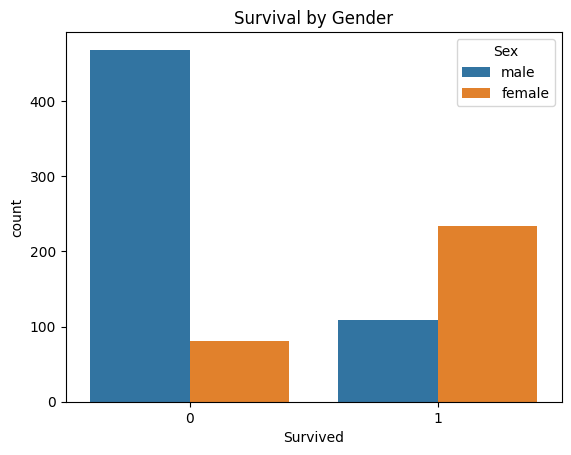

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


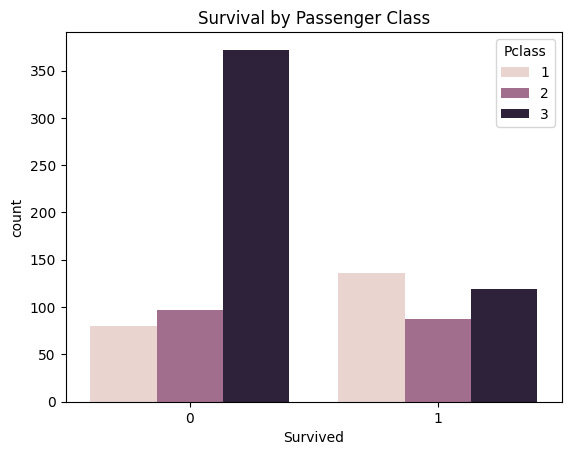

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()


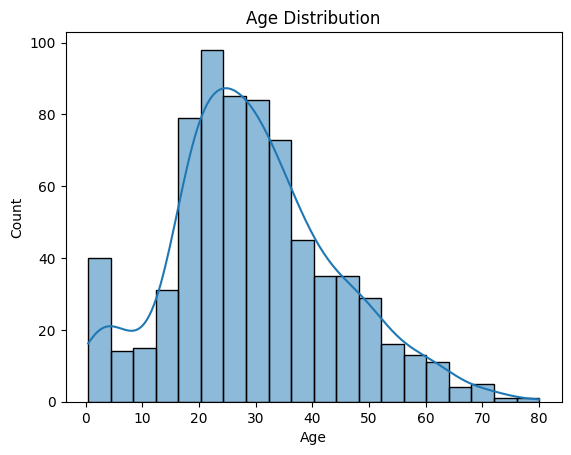

In [7]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()


In [8]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Cabin is mostly missing


In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)


/tmp/ipython-input-9-286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-10-411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
# Encode 'Sex' as 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [14]:
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']                 # Target


In [15]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [17]:
y_pred = dt_model.predict(X_test)


Decision Tree Accuracy: 0.80


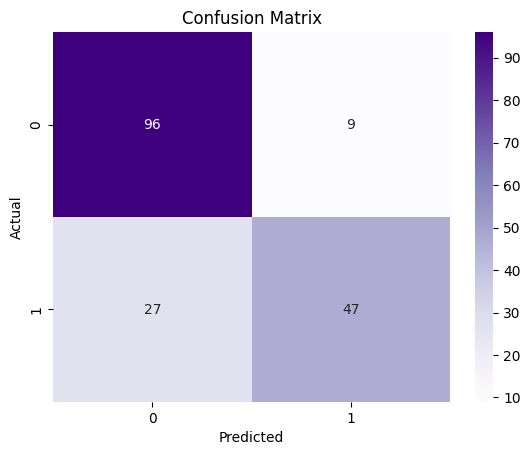

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


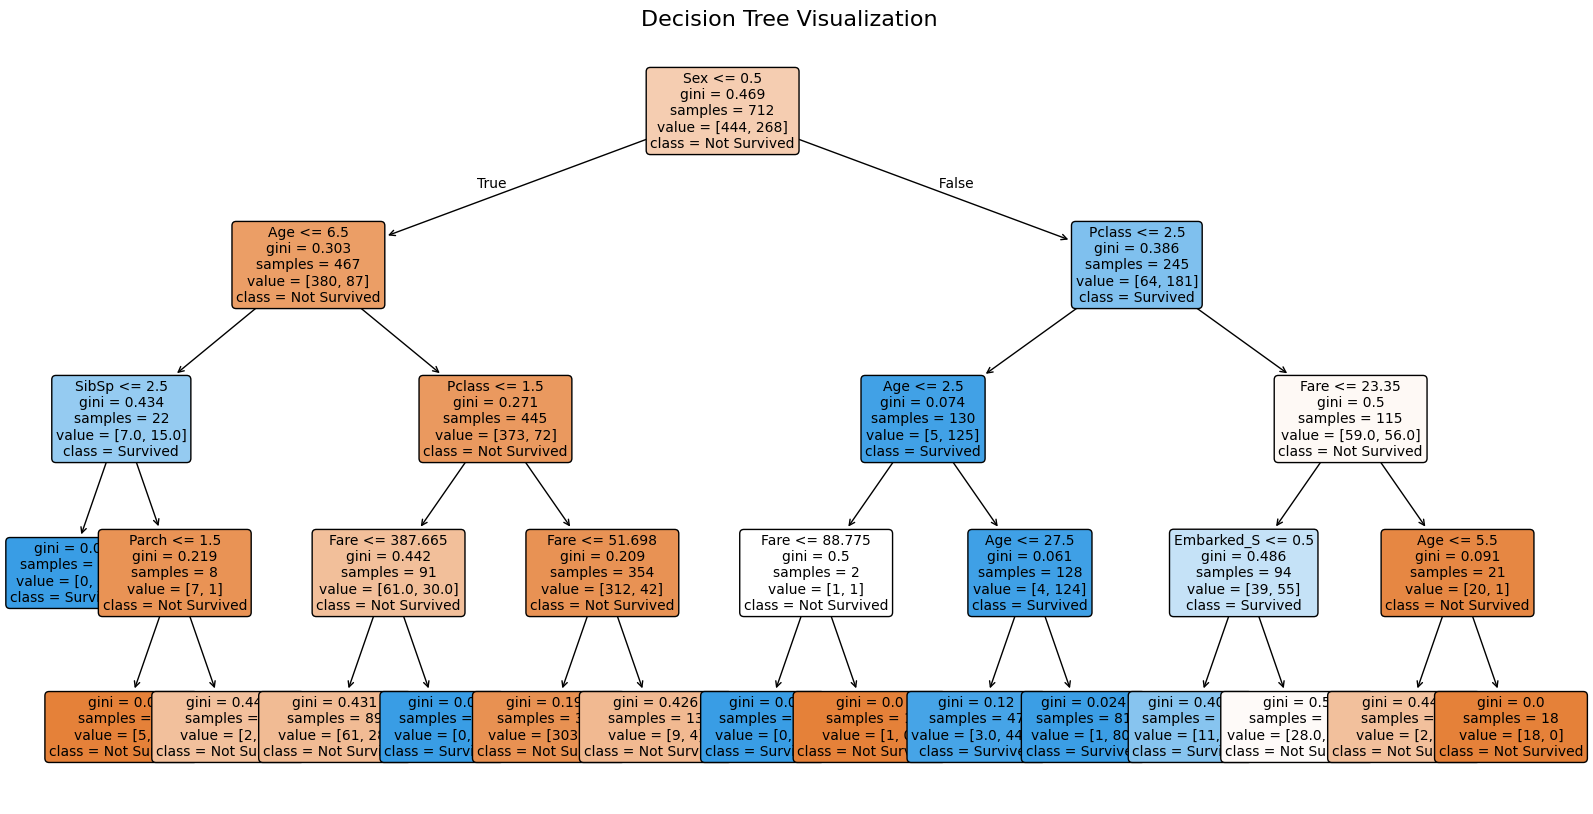

In [20]:
plt.figure(figsize=(20, 10))  # Bigger figure for clarity

plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)


In [22]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, random_state=42)

In [23]:
rf_preds = rf_model.predict(X_test)


Random Forest Accuracy: 0.80


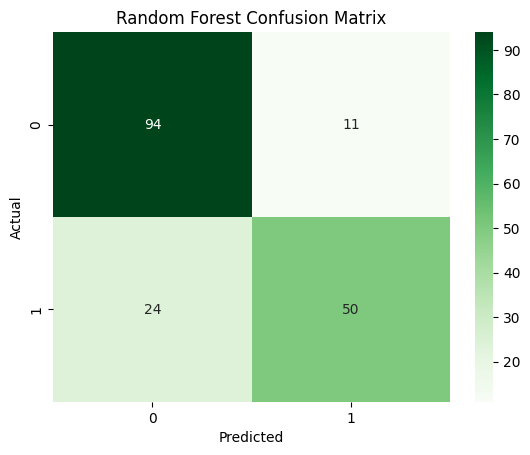

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.2f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, rf_preds))


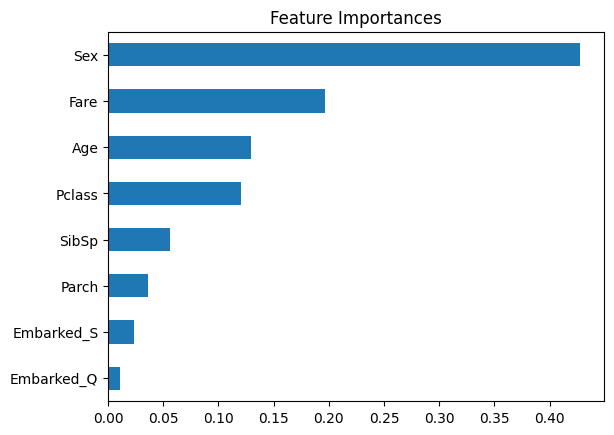

In [25]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importances")
plt.show()
